In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from scipy import stats
from statsmodels.stats.anova import AnovaRM
%matplotlib inline 

### Load dataframes for the different timepoints, perform Repeated Measures ANOVA on average EEG amplitude with condition (low, med, high) and masking (masked, unmasked) as within subject factors 

In [2]:
print("pool - t1")
df_t1=pd.read_csv('E:/Projects/2020_recurrentprocessing/Data/extra20/data_t1_75_81_pool_elec.csv')
aovrm = AnovaRM(df_t1, 'c', 'subj_idx', within=['condition','masking'])
fit = aovrm.fit()
print(fit)
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
print('p_eta_s = ', p_eta_s)

print("pool - t2")
df_t2=pd.read_csv('E:/Projects/2020_recurrentprocessing/Data/extra20/data_t2_82_90_pool_elec.csv')
aovrm = AnovaRM(df_t2, 'c', 'subj_idx', within=['condition','masking'])
fit = aovrm.fit()
print(fit)
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
print('p_eta_s = ', p_eta_s)

print("pool - t3")
df_t3=pd.read_csv('E:/Projects/2020_recurrentprocessing/Data/extra20/data_t3_91_107_pool_elec.csv')
aovrm = AnovaRM(df_t3, 'c', 'subj_idx', within=['condition','masking'])
fit = aovrm.fit()
print(fit)
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
print('p_eta_s = ', p_eta_s)

print("pool - t4")
df_t4=pd.read_csv('E:/Projects/2020_recurrentprocessing/Data/extra20/data_t4_108_122_pool_elec.csv')
aovrm = AnovaRM(df_t4, 'c', 'subj_idx', within=['condition','masking'])
fit = aovrm.fit()
print(fit)
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
print('p_eta_s = ', p_eta_s)

print("pool - t5")
df_t5=pd.read_csv('E:/Projects/2020_recurrentprocessing/Data/extra20/data_t5_123_140_pool_elec.csv')
aovrm = AnovaRM(df_t5, 'c', 'subj_idx', within=['condition','masking'])
fit = aovrm.fit()
print(fit)
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
print('p_eta_s = ', p_eta_s)


pool - t1
                     Anova
                  F Value Num DF  Den DF Pr > F
-----------------------------------------------
condition          0.3381 2.0000 36.0000 0.7154
masking            1.5255 1.0000 18.0000 0.2327
condition:masking  0.0382 2.0000 36.0000 0.9625

p_eta_s =  [0.018437239262345147]
pool - t2
                     Anova
                  F Value Num DF  Den DF Pr > F
-----------------------------------------------
condition         22.8766 2.0000 36.0000 0.0000
masking            5.3779 1.0000 18.0000 0.0324
condition:masking  0.1714 2.0000 36.0000 0.8432

p_eta_s =  [0.5596503341282745]
pool - t3
                     Anova
                  F Value Num DF  Den DF Pr > F
-----------------------------------------------
condition         24.2132 2.0000 36.0000 0.0000
masking            2.4572 1.0000 18.0000 0.1344
condition:masking  0.5695 2.0000 36.0000 0.5708

p_eta_s =  [0.5735931688256783]
pool - t4
                     Anova
                  F Value Num D

## Plot 5 timepoints in one figure

In [3]:
df_t1.rename(columns={"c": "tp_1"}, inplace=True)
df_t2.rename(columns={"c": "tp_2"}, inplace=True)
df_t3.rename(columns={"c": "tp_3"}, inplace=True)
df_t4.rename(columns={"c": "tp_4"}, inplace=True)
df_t5.rename(columns={"c": "tp_5"}, inplace=True)

# print(df_t1.head(5))
# print(df_t2.head(5))
# print(df_t3.head(5))
merged_t1_t2 = pd.merge(left=df_t1,right=df_t2, left_on=['subj_idx', 'masking', 'condition'], right_on=['subj_idx', 'masking', 'condition'])
# print(merged_t1_t2.head(5))


In [4]:
merged_t3 = pd.merge(left=merged_t1_t2,right=df_t3, left_on=['subj_idx', 'masking', 'condition'], right_on=['subj_idx', 'masking', 'condition'])
merged_t4 = pd.merge(left=merged_t3, right=df_t4,left_on=['subj_idx', 'masking', 'condition'], right_on=['subj_idx', 'masking', 'condition'])
merged_all = pd.merge(left=merged_t4, right=df_t5,left_on=['subj_idx', 'masking', 'condition'], right_on=['subj_idx', 'masking', 'condition'])

condi = {1: 'low', 2: 'med', 3: "high"}
merged_all["condition"].replace(condi, inplace=True)

merged_unmasked = merged_all[merged_all['masking']==0]
merged_masked = merged_all[merged_all['masking']==1]

merged_unmasked.drop(columns=['masking'], inplace=True)
merged_masked.drop(columns=['masking'], inplace=True)
#print(merged_unmasked.head(10))


C:\Users\noors\anaconda3\envs\BP2\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
l_unmasked = pd.wide_to_long(merged_unmasked, stubnames='tp', i=['subj_idx', 'condition'], j='timepoint',
...                     sep='_', suffix='\w+')

l_masked = pd.wide_to_long(merged_masked, stubnames='tp', i=['subj_idx', 'condition'], j='timepoint',
...                     sep='_', suffix='\w+')

In [6]:
# print(l_unmasked.head(10))
l_unmasked['tp']=l_unmasked['tp']*1e6
# print(l_unmasked.head(10))

# print(l_masked.head(10))
l_masked['tp']=l_masked['tp']*1e6
# print(l_masked.head(10))

In [7]:
data_unmasked=l_unmasked
data_unmasked = data_unmasked.reset_index(drop=False)

data_masked=l_masked
data_masked = data_masked.reset_index(drop=False)

C:\Users\noors\anaconda3\envs\BP2\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'bottom center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


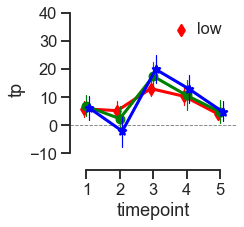

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.set_context('talk')

# Initialize the figure
f, ax = plt.subplots(figsize=(3,3))
#sns.despine(bottom=True, left=True)
##sns.set(style="whitegrid", color_codes=True)
#sns.color_palette("Paired")
# Show each observation with a scatterplot
#sns.stripplot(x="timepoint", y="tp", hue="condition",hue_order=['low','med', 'high'],
#              data=data, dodge=False, jitter=True,
#              alpha=.4, zorder=1)

#fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(4, 6), frameon=False)

# Show the conditional means
# sns.pointplot(x="timepoint", y="tp", hue="condition",hue_order=['low','med', 'high'],
#                data=data_unmasked, dodge=.15, join=True,markers=["d", "o", '*'],errwidth=1,
#                  scale=1,bw=.2, palette=sns.color_palette([ "red","green", "blue"]))

ax =sns.pointplot(x="timepoint", y="tp", hue="condition",hue_order=['low','med', 'high'],
              data=data_unmasked, dodge=.15, join=True,markers=["d", "o", '*'],errwidth=1.2,
                  #legend = False, 
                  #bw = 0.5,
                scale=0.75,bw=.2, 
              palette=sns.color_palette([ "red","green", "blue"]), linestyle='--')

#plt.setp(ax.ax.lines,linewidth=1.6)
ax.set_yticks((-10,0,10,20,30,40))

#Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:1], labels[:1],
          handletextpad=0, columnspacing=0.01,
          loc="bottom center", frameon=False)

ax.set(ylim=(-16,42))
plt.axhline(0,color='gray',linestyle='--',linewidth=0.9)
#ax.set(title='unmasked')

# sns.set_style("dark",{'axes.axisbelow': True,
#  'axes.edgecolor': 'black',
#  'axes.facecolor': 'white',
#  'axes.grid': False,
#  'axes.labelcolor': 'black',
#  'axes.spines.bottom': True,
#  'axes.spines.left': False,
#  'axes.spines.right': False,
#  'axes.spines.top': False,
#  'figure.facecolor': 'white',
#  'font.family': ['sans-serif'],
#  'font.sans-serif': ['Helvetica Neue Light',
#   'DejaVu Sans',
#   'Liberation Sans',
#   'Bitstream Vera Sans',
#   'sans-serif'],
#  'grid.color': 'white',
#  #'grid.linestyle': '-',
#  'image.cmap': 'rocket',
#  'lines.solid_capstyle': 'round',
#  'patch.edgecolor': 'white',
#  'patch.force_edgecolor': True,
#  'text.color': 'black',
#  'xtick.bottom': False,
#  'xtick.color': '.15',
#  'xtick.direction': 'out',
#  'xtick.top': False,
#  'ytick.color': '.15',
#  'ytick.direction': 'out',
#  'ytick.left': False,
#  'ytick.right': False})

#sns.set_context("paper")
#sns.set_context("paper", font_scale=2.2, rc={"lines.linewidth": 3.5})
sns.despine(offset=0, trim=True)

